In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from constants import TRAJECTORYTOOLS_INDIV_VARS_FILE_PATH, TR_INDIV_VARS_BOXPLOTS_FILE_PATH, TRAJECTORIES_INDEX_FILE_NAME, ANIMALS_INDEX_FILE_PATH
from trajectorytools.export import INDIVIDUAL_VARIALBES
from ipywidgets import interact
from plotters import _plot_line_variables

In [2]:
tr_indivs = pd.read_pickle(TRAJECTORYTOOLS_INDIV_VARS_FILE_PATH)
tr_indivs['line'] = tr_indivs['gene'] + '_' + tr_indivs['founder'].astype(str)
tr_indivs = tr_indivs[tr_indivs.experiment_type == 1]

In [3]:
individual_variables_names = [var_['name'] for var_ in INDIVIDUAL_VARIALBES]
agg_rule = {col: 'mean' if col != 'distance_travelled' else 'max' for col in tr_indivs.columns if col in individual_variables_names}

In [4]:
tr_indivs_indiv_stat = tr_indivs.groupby(['trial_uid', 'identity', 'genotype_group', 'genotype', 'line', 'replicate']).agg(agg_rule)
tr_indivs_indiv_stat.reset_index(inplace=True)
lines = tr_indivs_indiv_stat.line.unique()
variables = [
    'distance_to_origin', 
    'speed', 
    'acceleration', 
    'abs_normal_acceleration', 
    'abs_tg_acceleration',
    'distance_travelled',
]

In [5]:
variables_ = variables
@interact(
    line=lines, 
)
def plot_attention_map(
    line=lines[0], 
):  
    fig, axs = plt.subplots(1, len(variables_), figsize=(6 * len(variables_),5), num=1)
    plt.subplots_adjust(wspace=0.4)
    _plot_line_variables(axs, tr_indivs_indiv_stat, line, variables_)

interactive(children=(Dropdown(description='line', options=('ap1g1_1', 'apbb1_1', 'asap1b_7', 'cdon_1', 'evi5b…

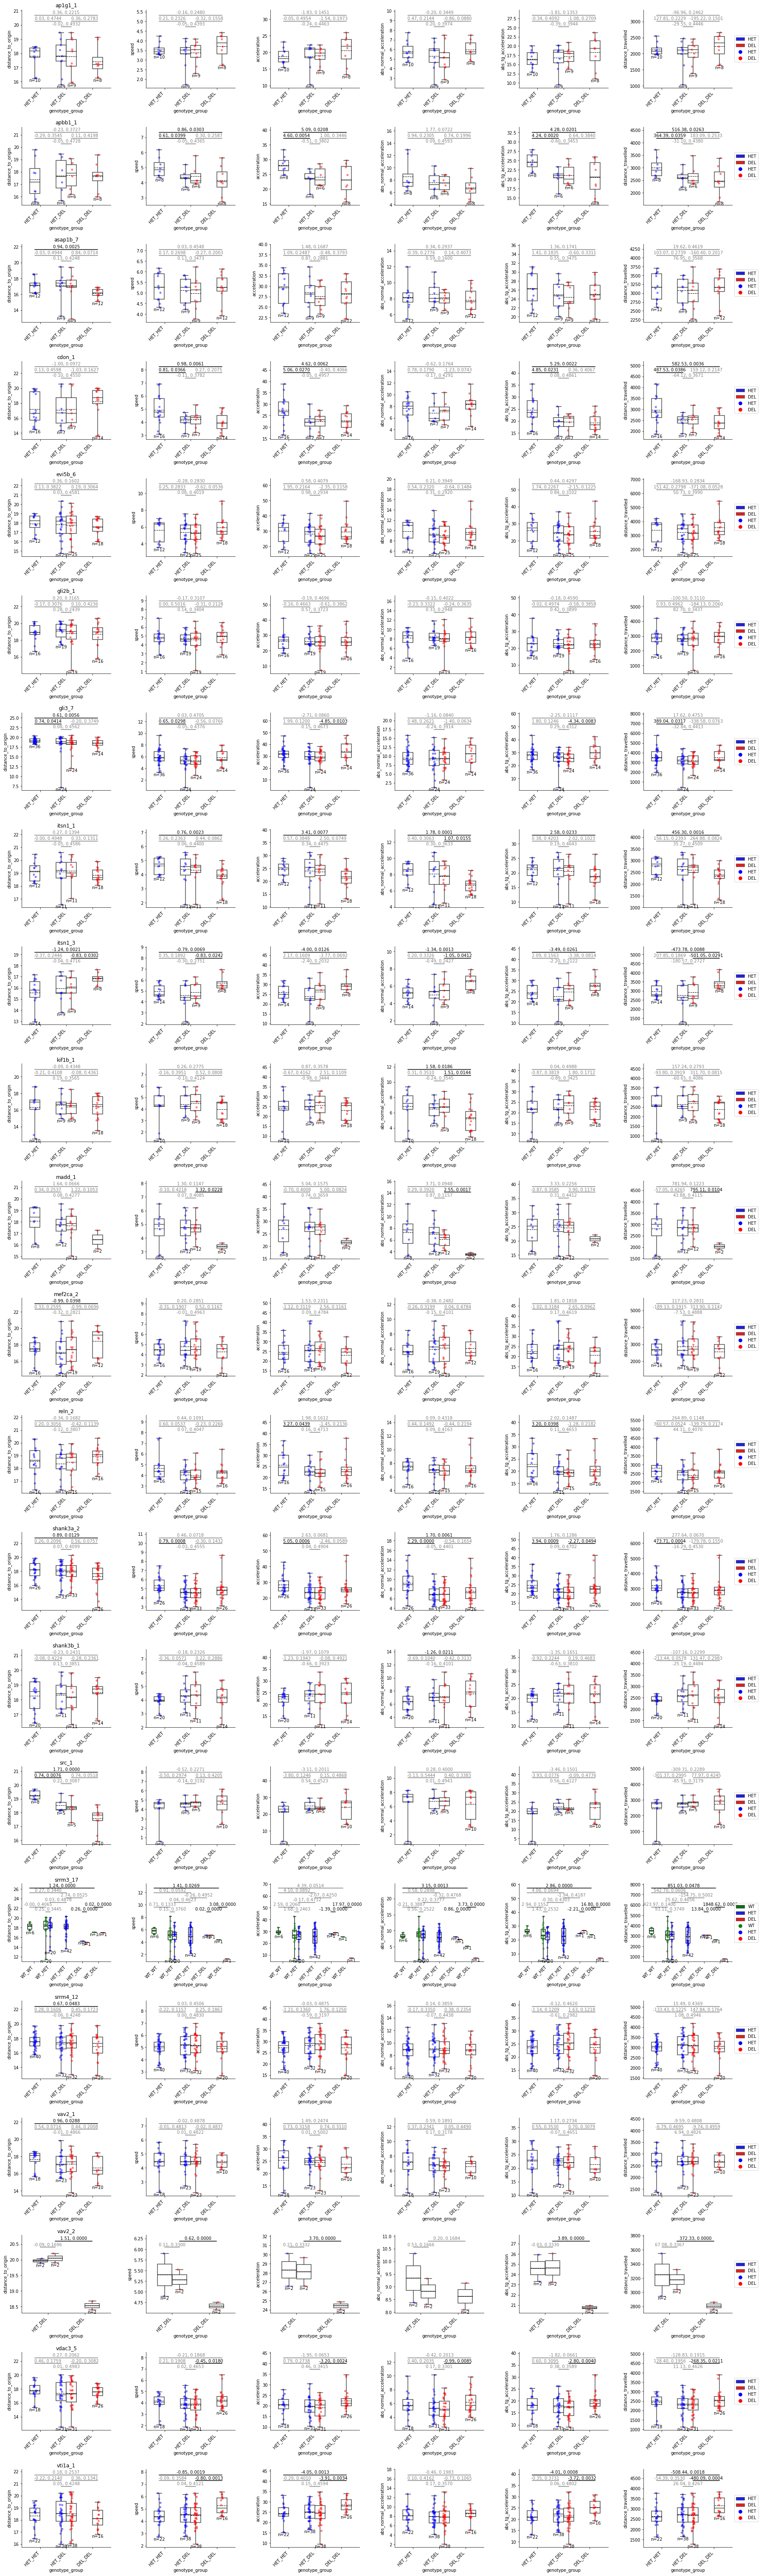

In [6]:
fig, axs = plt.subplots(len(lines), len(variables), figsize=(30, 5 * len(lines)))
plt.subplots_adjust(wspace=0.4, hspace=.5)
for axs_row, line in zip(axs, lines):
    _plot_line_variables(axs_row, tr_indivs_indiv_stat, line, variables)
fig.savefig(TR_INDIV_VARS_BOXPLOTS_FILE_PATH, transparent=False)
fig.savefig(TR_INDIV_VARS_BOXPLOTS_FILE_PATH.replace('.pdf', '.png'), transparent=False)